# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/Credit.csv')

df['Rating_Category'] = df['Rating'].apply(lambda x: 'Good' if x >= 670 else 'Poor')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Rating_Category
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,Poor
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,Poor
2,104.593,7075,514,4,71,11,No,No,No,West,580,Poor
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,Good
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,Poor


# Data Visualization

<Figure size 640x480 with 0 Axes>

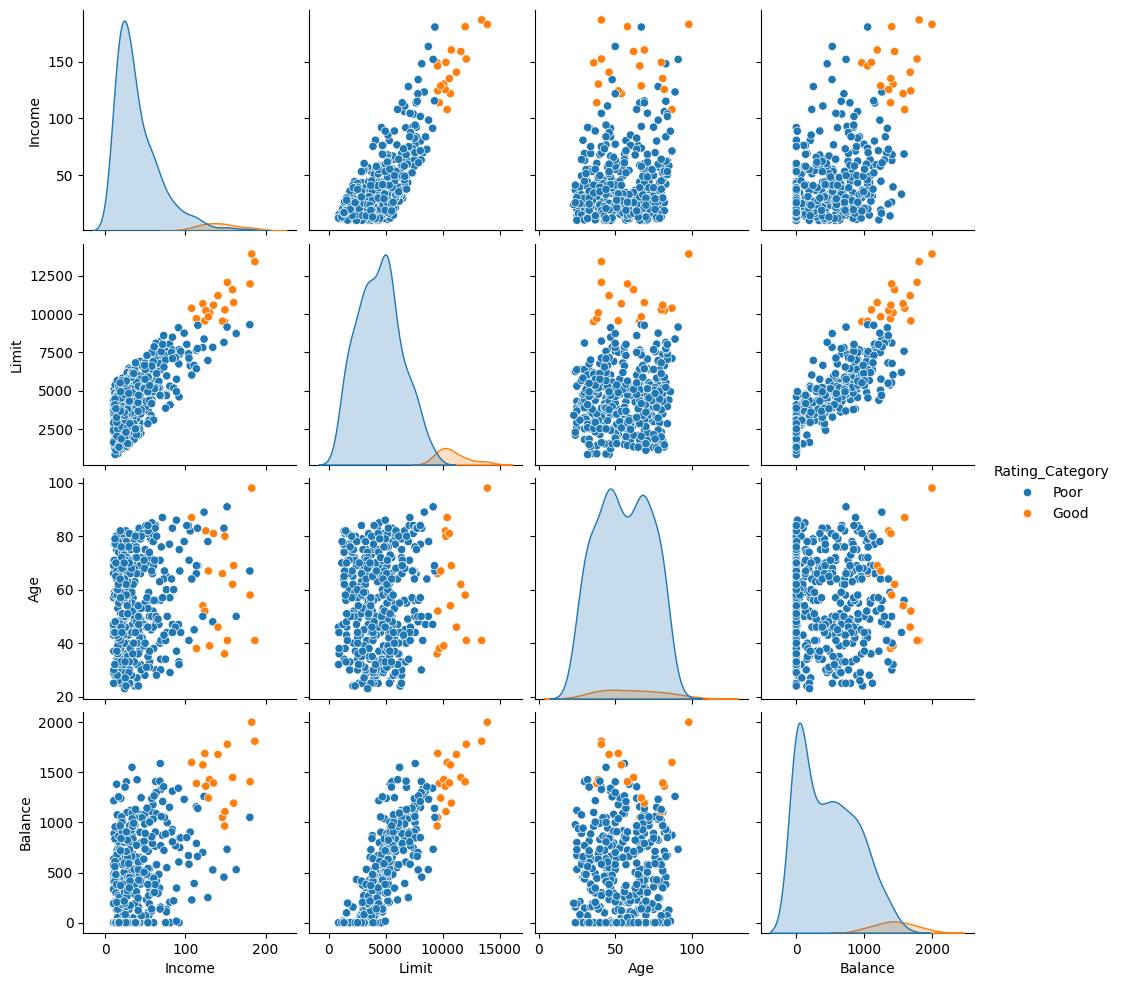

In [3]:
# Income, Limit, Age, Balance
plt.figure()
features = ['Income', 'Limit', 'Age', 'Balance']
sns.pairplot(df, vars=features, hue='Rating_Category')

# Model Evaluation

In [4]:
# Went from 4 to 3 features as age was determined to not have a strong correlation
X = df[['Income', 'Limit', 'Balance']].to_numpy()
df["Rating_Category_int"] = df["Rating_Category"].astype('category').cat.codes

# Mapping: 0 - Good 1 - Poor
y = df["Rating_Category_int"].to_numpy()

# Normalize the Input Data
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [5]:
def train_test_split(X,y,test_percent):
  numRows = y.size
  splitPoint = int((1-test_percent)*numRows)
  p = np.random.permutation(numRows)
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [6]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [7]:
def avg_accuracy_testing(classifier, X, y, count = 200, split=0.33):
  acc = 0
  for _ in range(0,count):
    X_train, X_test, y_train, y_test = train_test_split(X,y,split)
    acc += accuracy(classifier, X_train, y_train, X_test, y_test)
  return acc/count

In [8]:
def avg_accuracy_training(classifier, X, y, count=200, split=0.33):
    acc = 0
    for _ in range(count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, split)
        acc += accuracy(classifier, X_train, y_train, X_train, y_train)
    return acc / count

In [9]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [10]:
# A KNN Classifier
def knn_classifier(k):
  def knn_classify(X_train, y_train, X_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)
    return pred
  return knn_classify

<Axes: xlabel='k', ylabel='value'>

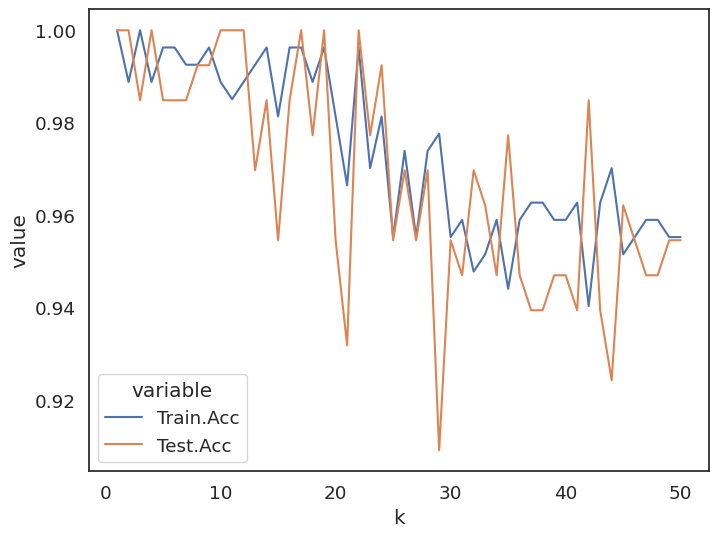

In [11]:
# Compute the accuracy for both training and testing sets for different Ks
ks = np.arange(1,51)
train_acc_list = []
test_acc_list = []
for k_cur in ks:
  my_knn = knn_classifier(k_cur)
  X_train, X_test, y_train, y_test = train_test_split(X, y, 0.33)
  test_acc = 0
  train_acc = 0
  for i in range(0,20):
    test_acc += accuracy(my_knn, X_train, y_train, X_test, y_test)/20
    train_acc += accuracy(my_knn, X_train, y_train, X_train, y_train)/20 #want to test training points
  test_acc_list.append(test_acc)
  train_acc_list.append(train_acc)

from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
pd.melt(result, ['k'])
sns.lineplot(x="k",y="value", hue='variable', data=pd.melt(result, ['k']))

In [12]:
# A KNN Classifier with a small K of choice & Metrics for knn_classifier
# Splitting data into Testing and Training Datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, 0.33)

# k = 3
knn = knn_classifier(3)

# Predictions via KNN
y_train_pred = knn(x_train, y_train, x_train)
y_test_pred = knn(x_train, y_train, x_test)

# Accuracies
train_accuracy = avg_accuracy_training(knn, x_train, y_train, count=200, split=0.33)
test_accuracy = avg_accuracy_testing(knn, x_train, y_train, count=200, split=0.33)

# Precisions
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)

# Recall
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("KNN Classifier Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print(f"Training Precision: {train_precision:.4f}")
print(f"Testing Precision: {test_precision:.4f}")

print(f"Training Recall: {train_recall:.4f}")
print(f"Testing Recall: {test_recall:.4f}")

print(f"Training F1-score: {train_f1:.4f}")
print(f"Testing F1-score: {test_f1:.4f}")


KNN Classifier Performance:
Training Accuracy: 0.9969
Testing Accuracy: 0.9891
Training Precision: 1.0000
Testing Precision: 0.9937
Training Recall: 1.0000
Testing Recall: 0.9924
Training F1-score: 1.0000
Testing F1-score: 0.9928


In [13]:
# A Classifier that says all individuals have good credit
def all_good_classifier():
    def classify(X_train, y_train, X_test):
        return np.zeros(len(X_test))
    return classify

In [14]:
# Metrics for All Good Classifier
# Splitting data into Testing and Training Datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, 0.33)

# Running the classifier
all_good = all_good_classifier()

# Predictions via all_good_classifier
y_train_pred = all_good(x_train, y_train, x_train)
y_test_pred = all_good(x_train, y_train, x_test)

# Accuracies
train_accuracy = avg_accuracy_training(all_good, x_train, y_train, count=200, split=0.33)
test_accuracy = avg_accuracy_testing(all_good, x_train, y_train, count=200, split=0.33)

# Precisions
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)

# Recall
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("All Good Credit Classifier Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print(f"Training Precision: {train_precision:.4f}")
print(f"Testing Precision: {test_precision:.4f}")

print(f"Training Recall: {train_recall:.4f}")
print(f"Testing Recall: {test_recall:.4f}")

print(f"Training F1-score: {train_f1:.4f}")
print(f"Testing F1-score: {test_f1:.4f}")

All Good Credit Classifier Performance:
Training Accuracy: 0.0294
Testing Accuracy: 0.0305
Training Precision: 0.9710
Testing Precision: 0.9300
Training Recall: 0.0299
Testing Recall: 0.0758
Training F1-score: 0.0017
Testing F1-score: 0.0107


# Applying the Model

In [15]:
# 3 numbers that correlate to the 3 features (income, limit, balance) - Testing
test_applicant = np.array([60000, 7500, 1500])
features = X
labels = y
# note: X and y are the same as defined above but just renamed

In [16]:
# Predicting Credit Rating
knn_predict_rating = knn_classifier(3)
prediction_rating = knn_predict_rating(features, labels, test_applicant.reshape(1, -1))
print(int(prediction_rating[0]))

0


In [17]:
# Predicting Region
df["Region_int"] = df["Region"].astype('category').cat.codes

# Mapping: 0 - East 1 - South 2 - West
region = df["Region_int"].to_numpy()

knn_predict_region = knn_classifier(3)
prediction_region = knn_predict_region(features, region, test_applicant.reshape(1, -1))
print(int(prediction_region[0]))

0
